## 11.1日期和时间数据类型及工具 

In [2]:
from datetime import datetime

In [4]:
now = datetime.now()
now.year, now.month, now.day

(2019, 7, 16)

In [5]:
delta = datetime(2011,1,7) - datetime(2008, 6, 24, 8, 15)
delta

datetime.timedelta(926, 56700)

In [6]:
delta.days, delta.seconds

(926, 56700)

In [3]:
from datetime import timedelta
start = datetime(2011, 1, 7)
print(start + timedelta(12)) #加12天
print(start - 2*timedelta(12))

2011-01-19 00:00:00
2010-12-14 00:00:00


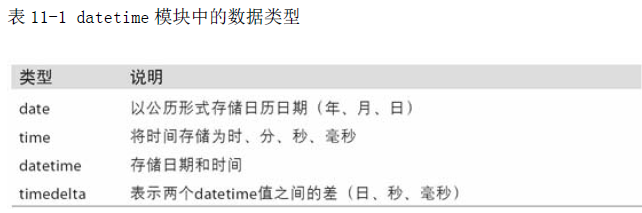

#### 字符串和datetime的互相转换 

In [13]:
# str format time
stamp = datetime(2011,1,3)
print(str(stamp))
stamp.strftime("%Y-%m-%d")

2011-01-03 00:00:00


'2011-01-03'

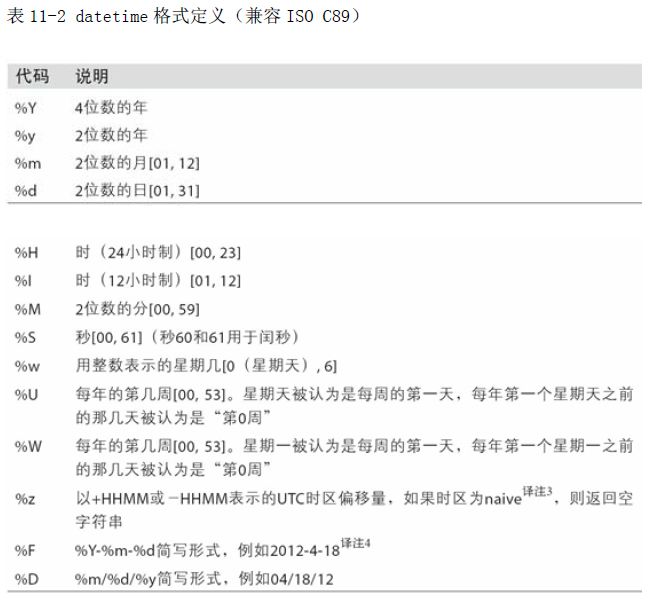

In [14]:
# str parse time
value = "2011-01-03"
datetime.strptime(value, "%Y-%m-%d")

datetime.datetime(2011, 1, 3, 0, 0)

In [17]:
datestrs = ["7/6/2011", "8/6/2011"]
[datetime.strptime(x, "%m/%d/%Y") for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [18]:
from dateutil.parser import parse
parse("2011-01-03")

datetime.datetime(2011, 1, 3, 0, 0)

In [19]:
parse("Jan 31, 1997 10:45 PM")

datetime.datetime(1997, 1, 31, 22, 45)

In [20]:
#日出现在月前面
parse("6/12/2011", dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

In [22]:
import pandas as pd
datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [23]:
pd.to_datetime("2011-07-06")

Timestamp('2011-07-06 00:00:00')

In [24]:
idx = pd.to_datetime(datestrs+[None])
idx  # None值解析为NaT，可以被pd.isnull()识别

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

## 11.2时间序列基础 

In [29]:
from datetime import datetime
import numpy as np

In [31]:
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)]
ts = pd.Series(np.random.randn(6), index=dates)
ts

[datetime.datetime(2011, 1, 2, 0, 0), datetime.datetime(2011, 1, 5, 0, 0), datetime.datetime(2011, 1, 7, 0, 0), datetime.datetime(2011, 1, 8, 0, 0), datetime.datetime(2011, 1, 10, 0, 0), datetime.datetime(2011, 1, 12, 0, 0)]


2011-01-02    0.536217
2011-01-05   -0.298475
2011-01-07   -0.240579
2011-01-08    1.564297
2011-01-10   -0.206563
2011-01-12   -0.638219
dtype: float64

In [34]:
#不同索引的时间序列之间的算术运算会自动按日期对齐
print(ts + ts[::2])
print(ts.index.dtype)
stamp = ts.index[0]
stamp

2011-01-02    1.072435
2011-01-05         NaN
2011-01-07   -0.481158
2011-01-08         NaN
2011-01-10   -0.413126
2011-01-12         NaN
dtype: float64
datetime64[ns]


Timestamp('2011-01-02 00:00:00')

#### 索引、选取、子集构造

In [35]:
stamp = ts.index[2]
ts[stamp]

-0.2405789823365734

In [37]:
#可以直接传入一个可以被解释为日期的字符串
print(ts['1/10/2011'])
print(ts['20110110'])

-0.2065629017913403
-0.2065629017913403


In [40]:
longer_ts = pd.Series(np.random.randn(1000),
                      index=pd.date_range('1/1/2000', periods=1000))
longer_ts

2000-01-01    0.934377
2000-01-02   -0.827897
2000-01-03   -0.909373
2000-01-04    0.700549
2000-01-05    0.101008
2000-01-06   -1.204441
2000-01-07    0.334949
2000-01-08   -0.001018
2000-01-09    0.228127
2000-01-10    0.127367
2000-01-11    1.707469
2000-01-12   -0.871348
2000-01-13   -0.116095
2000-01-14   -2.585738
2000-01-15   -0.055665
2000-01-16    0.590381
2000-01-17    0.938439
2000-01-18   -1.406793
2000-01-19    0.949457
2000-01-20    0.117313
2000-01-21    0.365510
2000-01-22    0.058239
2000-01-23   -0.589640
2000-01-24   -0.044430
2000-01-25   -0.731661
2000-01-26   -0.991334
2000-01-27    1.141478
2000-01-28   -0.992414
2000-01-29   -1.674825
2000-01-30   -2.863265
                ...   
2002-08-28    0.168553
2002-08-29    0.793668
2002-08-30   -2.347991
2002-08-31   -0.194845
2002-09-01   -1.065325
2002-09-02   -1.352940
2002-09-03    1.765373
2002-09-04   -0.015922
2002-09-05   -0.886226
2002-09-06    0.402112
2002-09-07   -0.835536
2002-09-08   -1.379452
2002-09-09 

In [41]:
#直接指定年/月对数据进行切片
print(longer_ts['2001'])
print(longer_ts['2001-05'])

2001-01-01    1.022878
2001-01-02   -0.759856
2001-01-03    0.165700
2001-01-04    0.537245
2001-01-05   -1.909691
2001-01-06    0.039061
2001-01-07   -0.814872
2001-01-08    1.209220
2001-01-09    0.973589
2001-01-10    1.345752
2001-01-11   -0.929091
2001-01-12   -1.510137
2001-01-13   -0.262831
2001-01-14   -0.777781
2001-01-15   -2.712142
2001-01-16   -1.469707
2001-01-17   -0.283212
2001-01-18    0.825946
2001-01-19   -0.612464
2001-01-20   -0.798015
2001-01-21    0.338815
2001-01-22    0.377828
2001-01-23   -1.286080
2001-01-24    0.878029
2001-01-25   -0.153880
2001-01-26    1.394592
2001-01-27   -1.319407
2001-01-28   -0.495251
2001-01-29   -0.906958
2001-01-30    0.320213
                ...   
2001-12-02    0.772436
2001-12-03    1.145437
2001-12-04   -0.532622
2001-12-05   -0.086893
2001-12-06    0.643955
2001-12-07   -0.258590
2001-12-08   -0.624662
2001-12-09   -0.392372
2001-12-10    0.074951
2001-12-11   -1.403695
2001-12-12   -0.297890
2001-12-13    0.919126
2001-12-14 

In [45]:
#datetime对象也可以进行切片
print(ts[datetime(2011,1,7):])

print(ts['1/6/2011':'1/11/2011'])
#等价实例方法
print(ts.truncate(after='1/9/2011'))

2011-01-07   -0.240579
2011-01-08    1.564297
2011-01-10   -0.206563
2011-01-12   -0.638219
dtype: float64
2011-01-07   -0.240579
2011-01-08    1.564297
2011-01-10   -0.206563
dtype: float64
2011-01-02    0.536217
2011-01-05   -0.298475
2011-01-07   -0.240579
2011-01-08    1.564297
dtype: float64


In [46]:
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')
long_df = pd.DataFrame(np.random.randn(100, 4),
                       index=dates,
                       columns=['Colorado', 'Texas',
                                'New York', 'Ohio'])
long_df.loc['5-2001']

,Colorado,Texas,New York,Ohio
2001-05-02,-0.064313,0.279978,0.912321,-0.763437
2001-05-09,0.465941,0.268206,1.098080,-0.512433
2001-05-16,0.134718,-0.425078,-0.528837,-0.141029
2001-05-23,0.325495,-1.182314,-0.743873,-0.007739
2001-05-30,-0.109940,-0.852947,-0.445237,-0.313650


#### 带有重复索引的时间序列 

In [47]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000',
                          '1/2/2000', '1/3/2000'])
dup_ts = pd.Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

In [48]:
dup_ts.index.is_unique

False

In [50]:
print(dup_ts['1/3/2000']) # 产生标量值
print(dup_ts['1/2/2000']) # 产生切片

4
2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int32


In [52]:
grouped = dup_ts.groupby(level=0)
print(grouped.mean())
grouped.count()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int32


2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

## 11.3 日期的范围、频率以及移动 

In [56]:
resampler = ts.resample('D')

#### 生成日期范围 

In [57]:
index = pd.date_range('2012-04-01', '2012-06-01')
pd.date_range(start='2012-04-01', periods=20)
pd.date_range(end='2012-06-01', periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [58]:
pd.date_range('2000-01-01', '2000-12-01', freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

频率参数列表
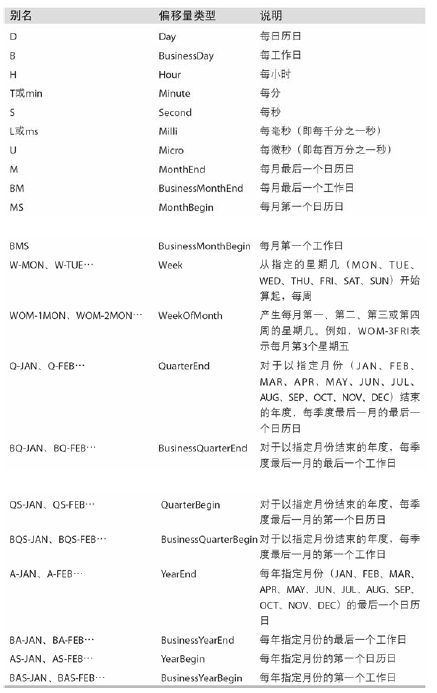

In [59]:
#date_range默认保存起始和结束时间戳的时间系你先，normalize可以规范到午夜
pd.date_range('2012-05-02 12:56:31', periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

#### 频率和日期偏移量 

In [60]:
from pandas.tseries.offsets import Hour, Minute
four_hours = Hour(4)

In [61]:
pd.date_range('2000-01-01', '2000-01-03 23:59', freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [62]:
Hour(2) + Minute(30)

<150 * Minutes>

In [63]:
pd.date_range('2000-01-01', periods=10, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

#### WOM日期（week of month）

In [64]:
rng = pd.date_range('2012-01-01', '2012-09-01', freq='WOM-3FRI')
list(rng)

[Timestamp('2012-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', freq='WOM-3FRI')]

#### 移动(超前和滞后)数据 

In [66]:
ts = pd.Series(np.random.randn(4),
               index=pd.date_range('1/1/2000', periods=4, freq='M'))
print(ts)
print(ts.shift(2))  # 前移
ts.shift(-2)

2000-01-31   -0.821811
2000-02-29    0.861259
2000-03-31    0.865703
2000-04-30    0.722806
Freq: M, dtype: float64
2000-01-31         NaN
2000-02-29         NaN
2000-03-31   -0.821811
2000-04-30    0.861259
Freq: M, dtype: float64


2000-01-31    0.865703
2000-02-29    0.722806
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

In [69]:
ts/ts.shift(1)-1

2000-01-31         NaN
2000-02-29   -2.048001
2000-03-31    0.005160
2000-04-30   -0.165064
Freq: M, dtype: float64

In [70]:
#加时间频率可以对索引进行修改，而不是简单的对数据进行位移
ts.shift(3, freq='D')

2000-02-03   -0.821811
2000-03-03    0.861259
2000-04-03    0.865703
2000-05-03    0.722806
dtype: float64

#### 通过偏移量对日期进行位移 

In [71]:
from pandas.tseries.offsets import Day, MonthEnd
now = datetime(2011, 11, 17)
now + 3 * Day()

Timestamp('2011-11-20 00:00:00')

In [72]:
now + MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

In [73]:
offset = MonthEnd()
print(offset.rollforward(now))
print(offset.rollback(now))

2011-11-30 00:00:00
2011-10-31 00:00:00


In [75]:
ts = pd.Series(np.random.randn(20),
               index=pd.date_range('1/15/2000', periods=20, freq='4d'))
print(ts)
ts.groupby(offset.rollforward).mean() #相当于按月统计平均值

2000-01-15    3.087554
2000-01-19    0.246121
2000-01-23   -0.832867
2000-01-27   -1.032946
2000-01-31    0.351826
2000-02-04    0.962319
2000-02-08    0.479397
2000-02-12   -1.276870
2000-02-16    0.420655
2000-02-20    1.476525
2000-02-24   -0.932454
2000-02-28    0.108741
2000-03-03    1.796920
2000-03-07    0.178818
2000-03-11   -0.317369
2000-03-15   -2.208668
2000-03-19   -1.333705
2000-03-23   -1.976610
2000-03-27   -2.223652
2000-03-31    0.721058
Freq: 4D, dtype: float64


2000-01-31    0.363938
2000-02-29    0.176902
2000-03-31   -0.670401
dtype: float64

In [76]:
ts.resample('M').mean()

2000-01-31    0.363938
2000-02-29    0.176902
2000-03-31   -0.670401
Freq: M, dtype: float64

## 11.4 时区处理

In [78]:
import pytz
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [79]:
tz = pytz.timezone('America/New_York')
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

#### 时区本地化和转换 

In [81]:
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
print(ts.index.tz)
ts

None


2012-03-09 09:30:00    1.225088
2012-03-10 09:30:00   -0.459643
2012-03-11 09:30:00    0.389812
2012-03-12 09:30:00    0.656927
2012-03-13 09:30:00    0.162141
2012-03-14 09:30:00   -0.700681
Freq: D, dtype: float64

In [82]:
pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC') #用时区生成日期范围

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [84]:
ts_utc = ts.tz_localize("UTC")
ts_utc

2012-03-09 09:30:00+00:00    1.225088
2012-03-10 09:30:00+00:00   -0.459643
2012-03-11 09:30:00+00:00    0.389812
2012-03-12 09:30:00+00:00    0.656927
2012-03-13 09:30:00+00:00    0.162141
2012-03-14 09:30:00+00:00   -0.700681
Freq: D, dtype: float64

In [85]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [87]:
ts_utc.tz_convert('America/New_York') #本地化的时间序列的时区转换

2012-03-09 04:30:00-05:00    1.225088
2012-03-10 04:30:00-05:00   -0.459643
2012-03-11 05:30:00-04:00    0.389812
2012-03-12 05:30:00-04:00    0.656927
2012-03-13 05:30:00-04:00    0.162141
2012-03-14 05:30:00-04:00   -0.700681
Freq: D, dtype: float64

In [88]:
ts_eastern = ts.tz_localize('America/New_York')
print(ts_eastern.tz_convert('UTC'))
print(ts_eastern.tz_convert('Europe/Berlin'))

2012-03-09 14:30:00+00:00    1.225088
2012-03-10 14:30:00+00:00   -0.459643
2012-03-11 13:30:00+00:00    0.389812
2012-03-12 13:30:00+00:00    0.656927
2012-03-13 13:30:00+00:00    0.162141
2012-03-14 13:30:00+00:00   -0.700681
Freq: D, dtype: float64
2012-03-09 15:30:00+01:00    1.225088
2012-03-10 15:30:00+01:00   -0.459643
2012-03-11 14:30:00+01:00    0.389812
2012-03-12 14:30:00+01:00    0.656927
2012-03-13 14:30:00+01:00    0.162141
2012-03-14 14:30:00+01:00   -0.700681
Freq: D, dtype: float64


#### 操作时区意识型Timestamp对象 

In [89]:
stamp = pd.Timestamp('2011-03-12 04:00')
stamp_utc = stamp.tz_localize('utc')
stamp_utc.tz_convert('America/New_York')

Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

In [90]:
#创建Timestamp时，传入一个时区信息
stamp_moscow = pd.Timestamp('2011-03-12 04:00', tz='Europe/Moscow')
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [91]:
print(stamp_utc.value)
stamp_utc.tz_convert('America/New_York').value

1299902400000000000


1299902400000000000

In [92]:
from pandas.tseries.offsets import Hour
stamp = pd.Timestamp('2012-03-12 01:30', tz='US/Eastern')
print(stamp)
stamp + Hour()

2012-03-12 01:30:00-04:00


Timestamp('2012-03-12 02:30:00-0400', tz='US/Eastern')

In [93]:
stamp = pd.Timestamp('2012-11-04 00:30', tz='US/Eastern')
print(stamp)
stamp + 2 * Hour()

2012-11-04 00:30:00-04:00


Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

#### 不同时区之间的运算

In [95]:
rng = pd.date_range('3/7/2012 9:30', periods=10, freq='B')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-07 09:30:00   -0.190728
2012-03-08 09:30:00   -2.592334
2012-03-09 09:30:00    0.367114
2012-03-12 09:30:00    0.069532
2012-03-13 09:30:00   -0.334335
2012-03-14 09:30:00   -0.611939
2012-03-15 09:30:00    0.944308
2012-03-16 09:30:00   -0.281217
2012-03-19 09:30:00    0.907243
2012-03-20 09:30:00   -0.701215
Freq: B, dtype: float64

In [96]:
ts1 = ts[:7].tz_localize('Europe/London')
ts2 = ts1[2:].tz_convert('Europe/Moscow')
result = ts1 + ts2
result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

## 11.5 时期及其算术运算 

In [98]:
p = pd.Period(2007, freq='A-DEC')
print(p)
p+5 #频率位移

2007


Period('2012', 'A-DEC')

In [99]:
pd.Period('2014', freq='A-DEC') - p #相同频率的period对象相减

<7 * YearEnds: month=12>

In [101]:
rng = pd.period_range('2000-01-01', '2000-06-30', freq='M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

In [102]:
pd.Series(np.random.randn(6), index=rng)

2000-01   -1.220480
2000-02   -0.640187
2000-03    0.160808
2000-04    0.219873
2000-05    1.521817
2000-06    0.977124
Freq: M, dtype: float64

In [103]:
values = ['2001Q3', '2002Q2', '2003Q1']
index = pd.PeriodIndex(values, freq='Q-DEC')
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

#### 时期的频率转换

In [104]:
p = pd.Period('2007', freq='A-DEC')
print(p) #asfreq转换频率
print(p.asfreq('M', how='start'))
print(p.asfreq('M', how='end'))

2007
2007-01
2007-12


## 11.6 重采样及频率转换 

In [105]:
rng = pd.date_range('2000-01-01', periods=100, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
print(ts)
print(ts.resample('M').mean())
print(ts.resample('M', kind='period').mean())

2000-01-01   -0.217965
2000-01-02    1.049845
2000-01-03   -0.970287
2000-01-04   -1.015983
2000-01-05    0.411745
2000-01-06    0.631184
2000-01-07    2.336696
2000-01-08    1.635125
2000-01-09    1.147688
2000-01-10    0.105863
2000-01-11   -0.065860
2000-01-12   -0.905230
2000-01-13    0.725728
2000-01-14   -1.712886
2000-01-15   -0.551059
2000-01-16   -1.879545
2000-01-17   -0.264174
2000-01-18    0.311213
2000-01-19    0.413565
2000-01-20   -1.587140
2000-01-21   -2.115684
2000-01-22   -0.964150
2000-01-23    0.747996
2000-01-24   -0.732244
2000-01-25   -0.625652
2000-01-26    0.503186
2000-01-27   -0.174590
2000-01-28    0.959607
2000-01-29   -0.666365
2000-01-30    0.681275
                ...   
2000-03-11   -0.252927
2000-03-12   -0.507608
2000-03-13    0.363267
2000-03-14    0.350377
2000-03-15    1.500527
2000-03-16    1.190971
2000-03-17   -0.297360
2000-03-18    0.306278
2000-03-19    0.608853
2000-03-20   -1.296791
2000-03-21   -1.938050
2000-03-22   -0.806588
2000-03-23 

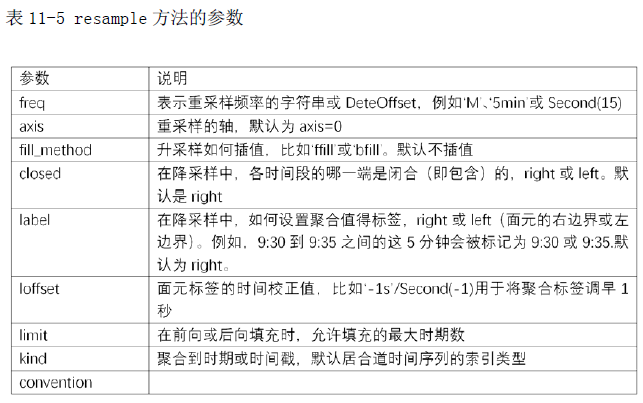

#### 降采样 

In [108]:
rng = pd.date_range('2000-01-01', periods=12, freq='T')
ts = pd.Series(np.arange(12), index=rng)
ts #按1分钟频率采样

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

In [107]:
ts.resample('5min', closed='right').sum() #右边区间闭合

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32

In [110]:
ts.resample('5min', closed='right', label='right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int32

In [111]:
ts.resample('5min', closed='right',
            label='right', loffset='-1s').sum()

1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int32

#### OHLC重采样 

In [112]:
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


#### 升采样和插值 

In [113]:
frame = pd.DataFrame(np.random.randn(2, 4),
                     index=pd.date_range('1/1/2000', periods=2,
                                         freq='W-WED'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,0.159710,-0.788771,-0.720494,2.941630
2000-01-12,0.743942,0.257064,0.646773,0.606926


## 11.7 移动窗口函数 

In [115]:
import os
os.chdir(r'C:\Users\hongzk\Desktop\pydata-book-2nd-edition')
close_px_all = pd.read_csv('examples/stock_px_2.csv',
                           parse_dates=True, index_col=0)
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px = close_px.resample('B').ffill()

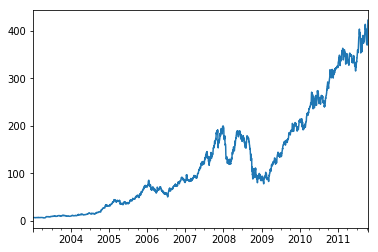

In [117]:
close_px.AAPL.plot()

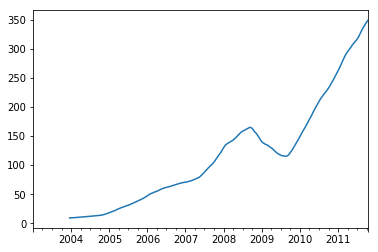

In [118]:
close_px.AAPL.rolling(250).mean().plot()

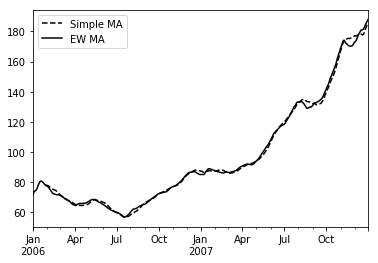

In [123]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
aapl_px = close_px.AAPL['2006':'2007']
ma60 = aapl_px.rolling(30, min_periods=20).mean()
ewma60 = aapl_px.ewm(span=30).mean()
ma60.plot(style='k--', label='Simple MA')
ewma60.plot(style='k-', label='EW MA')
plt.legend()

In [122]:
plt.close("all")